## Dataset used: [Breast Cancer Prediction Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

## Brief on the dataset used: the Wisconsin breast cancer diagnostic data set for predictive analysis

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3–32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter² / area — 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension (“coastline approximation” — 1)

All columns contain numerical data except the “diagnosis” attribute. This diagnosis attribute contains cancer type, i.e.- M(for malignant) or B(for benign), it is text data.

# Importing necessary libraries

In [249]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots


#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import seaborn as sns
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Loading the data

In [250]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


# Creating a dataframe

In [251]:
p = 'data.csv'
df = pd.read_csv(p)
print(df.shape)

(569, 33)


## Displaying the first 5 rows

In [252]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Applying the info() in the dataframe

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Removing unwanted column from the dataframe

In [254]:
df = df.drop(['Unnamed: 32'],axis=1)

## Getting the list of columns

In [255]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Printing the missing rows in 'symmetry_mean'

In [256]:
df[df['symmetry_mean'].isnull()].index

Int64Index([], dtype='int64')

There are no missing rows related to the above attribute

## Drop rows with at least one null value

In [257]:
df = df.dropna()

## Check whether all the missing values are removed or not.

In [258]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## How many rows and columns after removing missing values

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Print the last 5 rows

In [260]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# Garbage Value Inspection

## Get the descriptive statistics for all the numeric data-type columns

In [261]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Remove all the columns from the 'df' containing garbage values

In [262]:
df.drop(['id'], axis=1, inplace=True)

## How many rows contain 142.00 in each column except for the radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean' columns?

In [263]:
stat_df = df.copy()
stat_df.drop(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'], axis=1).apply(lambda x: x[x == 142.00]).count()

diagnosis                  0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            1
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## calculate the percentage of rows containing '142.00' in each column

In [264]:
stat_df = df.copy()
k1 = stat_df.drop(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'], axis=1).apply(lambda x: x[x == 142.00]).count()
k2 = stat_df.drop(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'], axis=1).count()
print(k1 / k2 * 100)

diagnosis                  0.000000
compactness_mean           0.000000
concavity_mean             0.000000
concave points_mean        0.000000
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
radius_se                  0.000000
texture_se                 0.000000
perimeter_se               0.000000
area_se                    0.000000
smoothness_se              0.000000
compactness_se             0.000000
concavity_se               0.000000
concave points_se          0.000000
symmetry_se                0.000000
fractal_dimension_se       0.000000
radius_worst               0.000000
texture_worst              0.000000
perimeter_worst            0.175747
area_worst                 0.000000
smoothness_worst           0.000000
compactness_worst          0.000000
concavity_worst            0.000000
concave points_worst       0.000000
symmetry_worst             0.000000
fractal_dimension_worst    0.000000
dtype: float64


## Calculate the median values for the columns having indices 2 and -4 for the smoothness_worst 0.11660	

In [265]:
df[df['smoothness_worst'] == 0.11660		].iloc[:, 2: -4].median()

texture_mean               14.780000
perimeter_mean             85.790000
area_mean                 541.800000
smoothness_mean             0.083630
compactness_mean            0.085750
concavity_mean              0.050770
concave points_mean         0.028640
symmetry_mean               0.175200
fractal_dimension_mean      0.055940
radius_se                   0.214400
texture_se                  0.996100
perimeter_se                1.592000
area_se                    15.260000
smoothness_se               0.005617
compactness_se              0.020730
concavity_se                0.028280
concave points_se           0.008468
symmetry_se                 0.017000
fractal_dimension_se        0.002498
radius_worst               14.240000
texture_worst              22.060000
perimeter_worst            96.590000
area_worst                623.700000
smoothness_worst            0.116600
compactness_worst           0.192200
dtype: float64

# Garbage Value Replacement

## Count the number of rows containing '28.25' and '22.39' texture_mean	 values.

In [266]:
df['texture_mean'].value_counts()

20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64

## Create a new DataFrame containing record for the texture_mean 22.39	 .

In [267]:
df_texture_mean = df[df['texture_mean'] == 22.39	]
df_texture_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,0.1726,...,25.45,26.4,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115


## Get the list of columns present in the Dataframe

In [268]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Univariate Grouping

## Group the records for the texture_mean DataFrame together by radius_mean

In [269]:
df_texture_mean.groupby('radius_mean')

## Get all the records for the radius_mean of value 21.56.

In [270]:
df_texture_mean[df_texture_mean['radius_mean'] == 21.56]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,0.1726,...,25.45,26.4,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115


## Get all the records for the diagnosis of M.

In [271]:
df[df['diagnosis'] == 'M']

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


## Get the descriptive statistics for diagnosis of malignant cancer

In [272]:
df[df['diagnosis'] == 'M'].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


## Get the descriptive statistics for diagnosis of beinign cancer

In [273]:
df[df['diagnosis'] == 'B'].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


## Get mean, standard deviation and median for texture_mean DataFrame together by radius_mean

In [274]:
df_texture_mean.groupby('radius_mean').agg(['mean', 'std', 'median'])

texture_mean            perimeter_mean            area_mean      \
                    mean std median           mean std median      mean std   
radius_mean                                                                   
21.56              22.39 NaN  22.39          142.0 NaN  142.0    1479.0 NaN   

                    smoothness_mean  ... concavity_worst concave points_worst  \
             median            mean  ...          median                 mean   
radius_mean                          ...                                        
21.56        1479.0           0.111  ...          0.4107               0.2216   

                        symmetry_worst            fractal_dimension_worst      \
            std  median           mean std median                    mean std   
radius_mean                                                                     
21.56       NaN  0.2216          0.206 NaN  0.206                 0.07115 NaN   

                      
              median  
radius_mean           
21.56        0.07115  

[1 rows x 87 columns]

## On 'group_df_texture_mean', apply the 'mean', 'std' & 'median' functions

In [275]:
group_df_texture_mean = df_texture_mean.groupby('radius_mean')
df_texture_mean["area_mean"] = pd.to_numeric(df["area_mean"], downcast="float")
df_texture_mean["smoothness_mean"] = pd.to_numeric(df["smoothness_mean"], downcast="float")

group_df_texture_mean["area_mean"].agg(['mean', 'std', 'median'])
group_df_texture_mean['smoothness_mean'].agg(['max'])

group_df_texture_mean['radius_mean'].agg(['count'])

,count
radius_mean,
21.56,1


## On the 'group_df_texture_mean', apply the 'min' and 'max' functions on the 'area_mean' and 'smoothness_mean' columns

In [276]:
group_df_texture_mean = df_texture_mean.groupby('symmetry_worst')
df_texture_mean['area_mean'] = pd.to_numeric(df["area_mean"], downcast="float")
df_texture_mean['smoothness_mean'] = pd.to_numeric(df['smoothness_mean'], downcast="float")

group_df_texture_mean['area_mean'].agg(['min', 'max'])
group_df_texture_mean['smoothness_mean'].agg(['min', 'max'])
group_df_texture_mean['symmetry_worst'].agg(['count'])

,count
symmetry_worst,
0.206,1


# Slicing DataFrame GroupBy Object

## Get the column indices for the 'group_df_texture_mean.agg()'

In [277]:
group_df_texture_mean.agg(func=['mean', 'std', 'median']).columns

MultiIndex([(            'radius_mean',   'mean'),
            (            'radius_mean',    'std'),
            (            'radius_mean', 'median'),
            (           'texture_mean',   'mean'),
            (           'texture_mean',    'std'),
            (           'texture_mean', 'median'),
            (         'perimeter_mean',   'mean'),
            (         'perimeter_mean',    'std'),
            (         'perimeter_mean', 'median'),
            (              'area_mean',   'mean'),
            (              'area_mean',    'std'),
            (              'area_mean', 'median'),
            (        'smoothness_mean',   'mean'),
            (        'smoothness_mean',    'std'),
            (        'smoothness_mean', 'median'),
            (       'compactness_mean',   'mean'),
            (       'compactness_mean',    'std'),
            (       'compactness_mean', 'median'),
            (         'concavity_mean',   'mean'),
            (         'concavit

# Multivariate Grouping & Aggregation

## Group the DataFrame about the 'radius_mean' and 'smoothness_mean' columns

In [278]:
df_new=df.groupby(['radius_mean', 'smoothness_mean'])

In [279]:
df_new.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# checking the dimensions of the dataframe

In [280]:
df.shape

(569, 31)

## Get numerical column

In [281]:
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Get categorical column

In [282]:
catColumn  = [col for col in df.columns if  df[col].dtype == "O"]
catColumn

['diagnosis']

# Dataset statistics

In [283]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

diagnosis                  0
compactness_se             0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
smoothness_se              0
radius_mean                0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
fractal_dimension_worst    0
dtype: int64

Creating a heatmap 

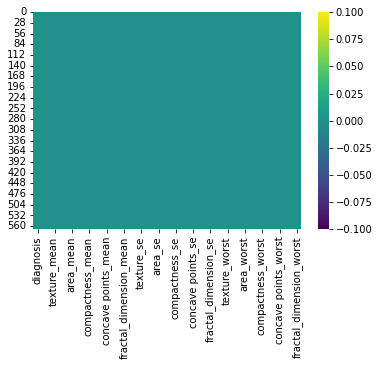

In [284]:
cols =df.columns
sns.heatmap(df[cols].isnull(), cmap='viridis')

# Data Analaysis & Visualization

## Analyzing the attributes

In [285]:
df.describe()[['radius_mean']].T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11


In [286]:
df.describe()[['texture_mean']].T

,count,mean,std,min,25%,50%,75%,max
texture_mean,569.0,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28


In [287]:
df.describe()[['perimeter_mean']].T

,count,mean,std,min,25%,50%,75%,max
perimeter_mean,569.0,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5


In [288]:
df.describe()[['area_mean']].T

,count,mean,std,min,25%,50%,75%,max
area_mean,569.0,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0


In [289]:
df['texture_mean'].value_counts().sort_values(ascending=False).head(10)

20.52    3
17.46    3
16.85    3
15.70    3
18.90    3
18.22    3
14.93    3
19.83    3
16.84    3
16.07    2
Name: texture_mean, dtype: int64

## Histogram

In [290]:
import matplotlib.pyplot as plot

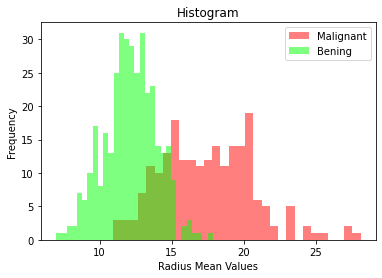

In [291]:
m = plot.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc=(1,0,0,0.5), label="Malignant")
b = plot.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc=(0,1,0,0.5), label="Bening")
plot.legend()
plot.xlabel("Radius Mean Values")
plot.ylabel("Frequency")
plot.title("Histogram")
plot.show()

Checking the mean of the dataframe data given the diagnosis is benign or malignant w.r.t to radius mean attribute

In [292]:
np.mean(df[df["diagnosis"] == "M"].radius_mean)

17.462830188679245

In [293]:
np.mean(df[df["diagnosis"] == "B"].radius_mean)

12.146523809523808

## Box plot

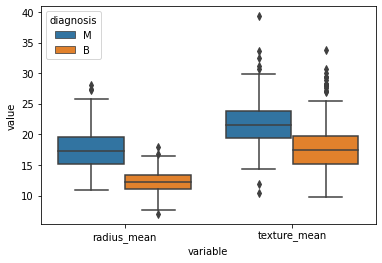

In [294]:
melted_data = pd.melt(df,id_vars = "diagnosis", value_vars = ['radius_mean', 'texture_mean'])
sns.boxplot(x = "variable", y="value",hue="diagnosis", data=melted_data)
plot.show()

In [295]:
data_bening = df[df["diagnosis"] == "B"]
print("mean: ", data_bening.radius_mean.mean())
print("variance: ", data_bening.radius_mean.var())
print("std: ", data_bening.radius_mean.std())
print("median: ", data_bening.radius_mean.median(), "\n")
print("describe method: ", data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.1702217220438738
std:  1.7805116461410393
median:  12.2 

describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


## CDF (Cumulative distribution function)


CDF is the probability that the variable takes a value less than or equal to x. P(X <= x)

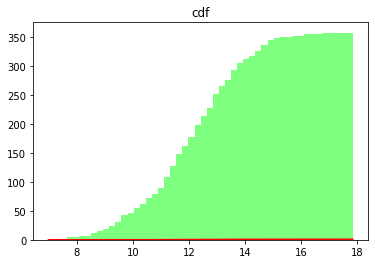

In [296]:
plot.hist(data_bening.radius_mean, bins=50, fc=(0,1,0,0.5), label='bening', cumulative = True)
# Why is this not possible to use 'normed = True' ? 
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plot.plot(sorted_data,y,color='r')
plot.title('cdf')
plot.show()

## Reg Plot

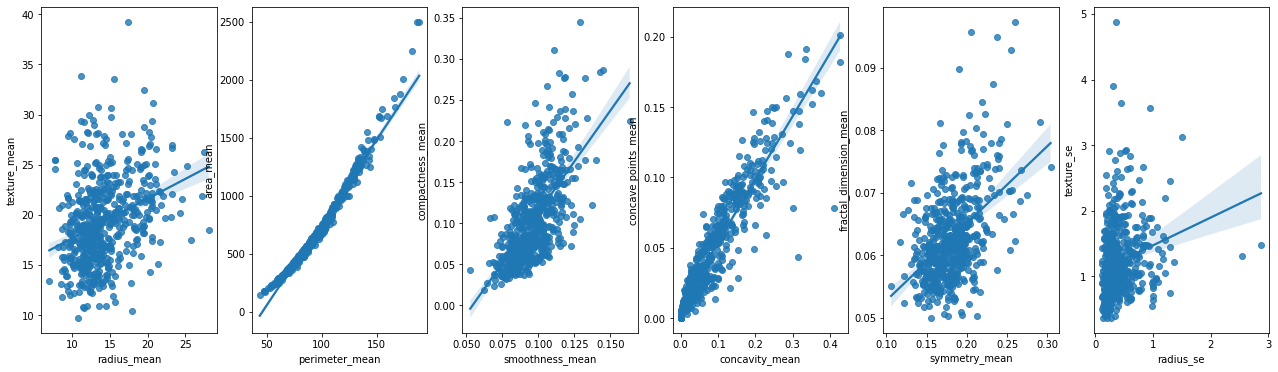

In [297]:
fig, axes = plt.subplots(1, 6, figsize = (22, 6))
sns.regplot(ax = axes[0], x = "radius_mean", y = "texture_mean", data = df );
sns.regplot(ax = axes[1], x = "perimeter_mean", y = "area_mean", data = df );
sns.regplot(ax = axes[2], x = "smoothness_mean", y = "compactness_mean", data = df);
sns.regplot(ax = axes[3], x = "concavity_mean", y = "concave points_mean", data = df );
sns.regplot(ax = axes[4], x = "symmetry_mean", y = "fractal_dimension_mean", data = df );
sns.regplot(ax = axes[5], x = "radius_se", y = "texture_se", data = df);

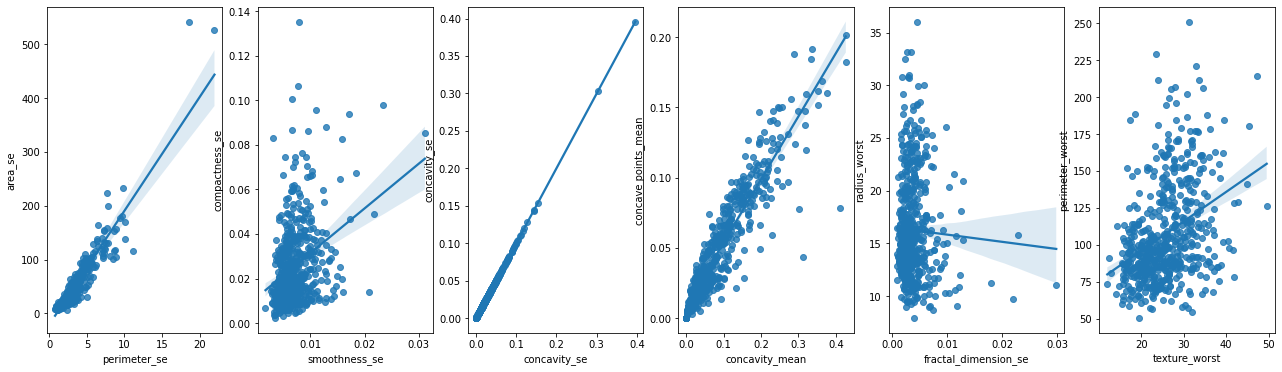

In [298]:
fig, axes = plt.subplots(1, 6, figsize = (22, 6))
sns.regplot(ax = axes[0], x = "perimeter_se", y = "area_se", data = df );
sns.regplot(ax = axes[1], x = "smoothness_se", y = "compactness_se", data = df );
sns.regplot(ax = axes[2], x = "concavity_se", y = "concavity_se", data = df);
sns.regplot(ax = axes[3], x = "concavity_mean", y = "concave points_mean", data = df );
sns.regplot(ax = axes[4], x = "fractal_dimension_se", y = "radius_worst", data = df );
sns.regplot(ax = axes[5], x = "texture_worst", y = "perimeter_worst", data = df);

## Correlation

To calculate the correlation coefficient between all the numeric columns in a DataFrame, use thecorr()function  of  the pandas module.  It  returns  an  N-dimensional  DataFrame  containing the correlation coefficient values between the numeric columns.

In [299]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


*   Huge matrix that includes a lot of numbers. The range of this numbers are -1 to 1.
*   Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
*   Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
*   Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.



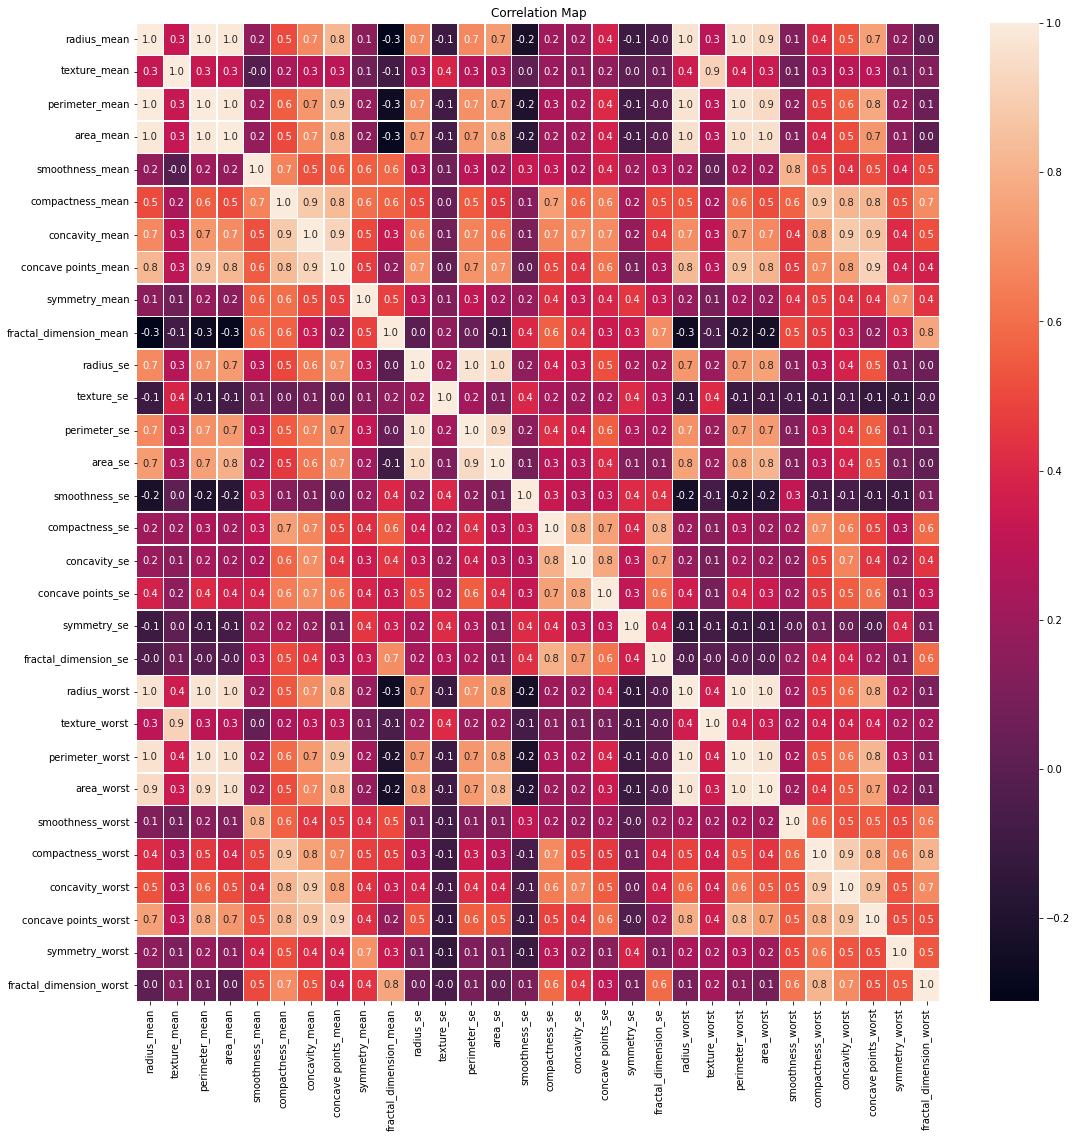

In [300]:
f, ax = plot.subplots(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, fmt = ".1f", ax = ax)
plot.xticks(rotation = 90)
plot.yticks(rotation = 0)
plot.title('Correlation Map')
plot.savefig('graph.png')
plot.show()

## Covariance


*   Covariance is measure of the tendency of two variables to vary together
*   So covariance is maximized if two vectors are identical
*  Covariance is zero if they are orthogonal. 
*  Covariance is negative if they point in opposite direction




In [301]:
np.cov(df.radius_mean,df.area_mean)
print("Cov between radius and area", df.radius_mean.cov(df.area_mean))
print("Cov between radius and fractal", df.radius_mean.cov(df.fractal_dimension_se))

Cov between radius and area 1224.483409346457
Cov between radius and fractal -0.0003976248576440629


## Z-scoring (Normalization)


(array([ 1.,  3.,  2.,  7.,  9., 10., 16., 13., 13., 19., 28., 28., 30.,
        26., 24., 32., 19., 22., 25., 17.,  8., 20., 18., 11., 12.,  5.,
         6.,  9.,  9.,  3.,  3.,  3.,  6.,  6.,  5.,  7.,  5.,  3.,  3.,
         6.,  6.,  3.,  7.,  4.,  4.,  6.,  5.,  6.,  4.,  6.,  2.,  2.,
         2.,  2.,  1.,  0.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         3.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-1.45444309, -1.38739337, -1.32034365, -1.25329393, -1.18624421,
        -1.11919449, -1.05214477, -0.98509505, -0.91804533, -0.85099561,
        -0.7839459 , -0.71689618, -0.64984646, -0.58279674, -0.51574702,
        -0.4486973 , -0.38164758, -0.31459786, -0.24754814, -0.18049842,
        -0.1134487 , -0.04639898,  0.02065073,  0.08770045,  0.15475017,
         0.22179989,  0.28884961,  0.35589933,  0.42294905,  0.489998

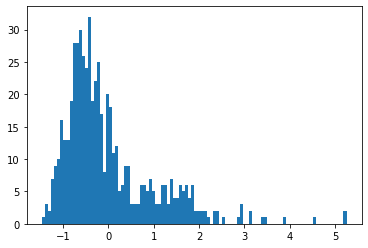

In [302]:
x = df.area_mean
x_mean = np.mean(x)
x_std = np.std(x)
z = (x-x_mean)/x_std
plot.hist(z,bins=100)

## Count plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


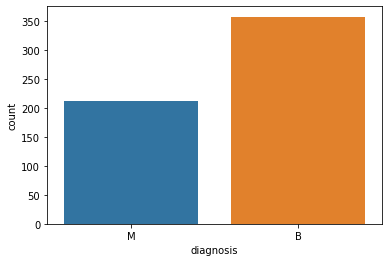

In [303]:
sns.countplot(df["diagnosis"])

In [304]:
print(df.diagnosis.value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [305]:
df["diagnosis"]=[1 if i.strip()=="M" else 0 for i in df.diagnosis]

## Correlation Between Features

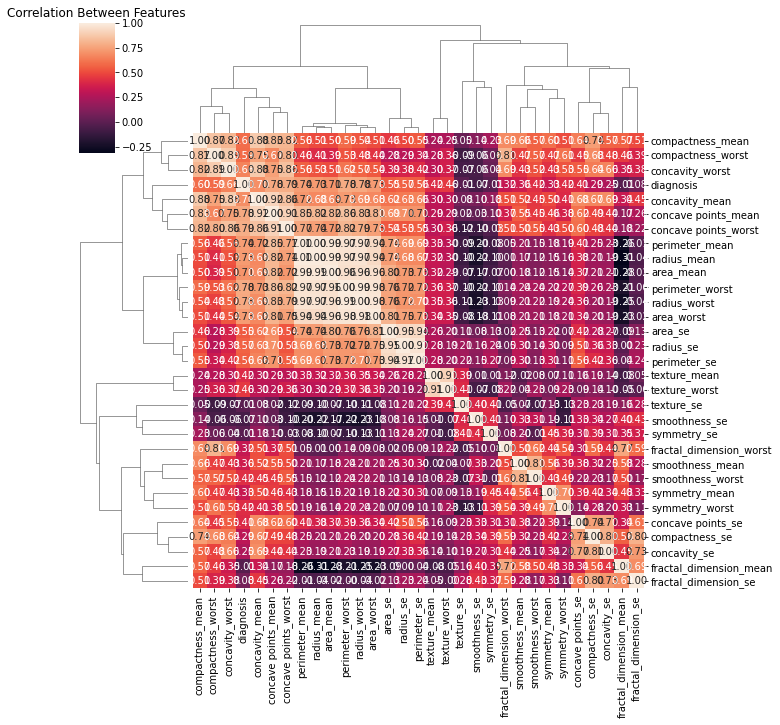

In [306]:
corr_matrix=df.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

## Correlation Between Features with Corr Threshold

Text(0.5, 1.0, 'Correlation Between Features w Corr Threshold')

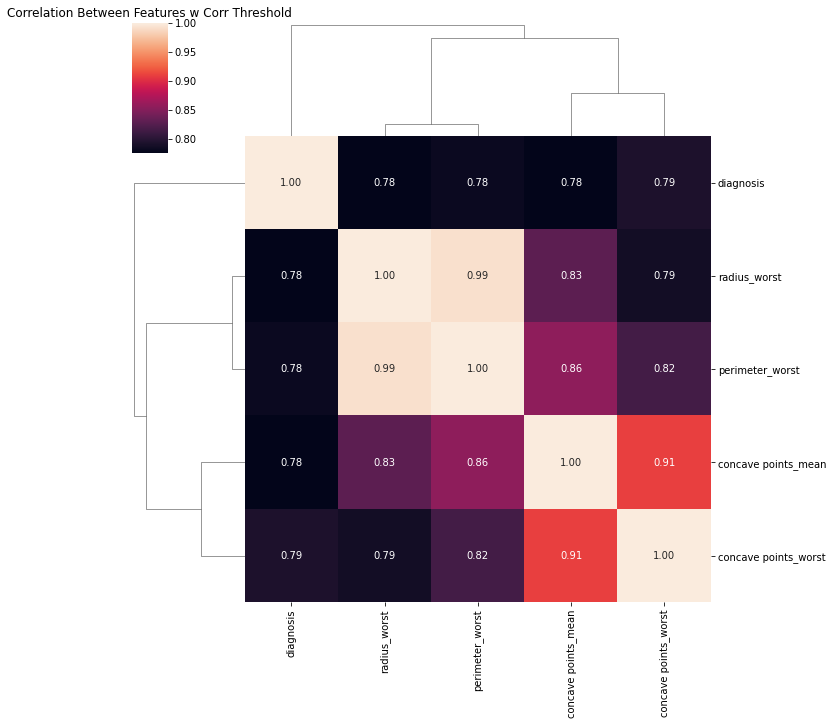

In [307]:
threshold=0.75
filtre=np.abs(corr_matrix["diagnosis"])>threshold
corr_features=corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Correlation Between Features w Corr Threshold")

## Pairplot

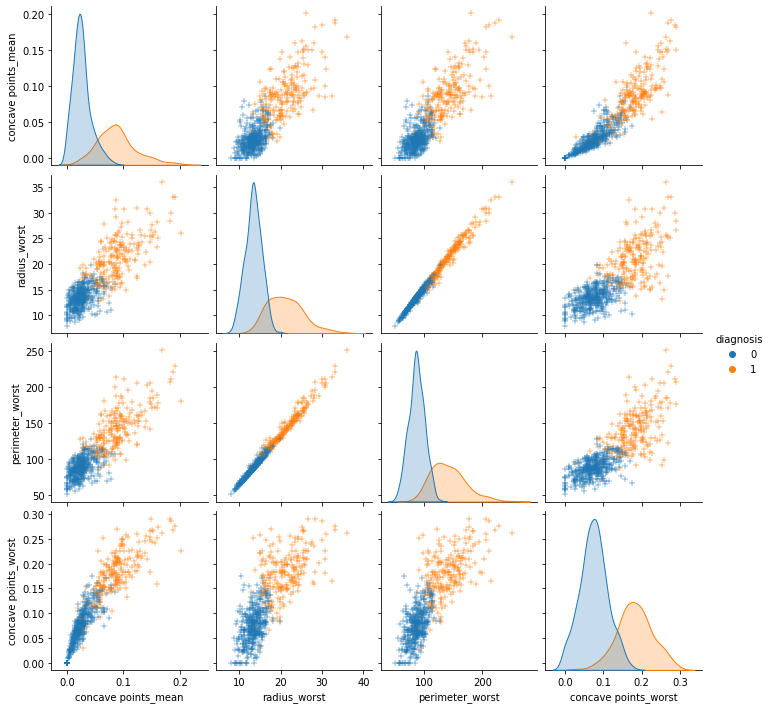

In [308]:
sns.pairplot(df[corr_features],diag_kind="kde",markers="+",hue="diagnosis")
plt.show()

## Customised matplotlib Plots

In [309]:
!pip install pandas plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Add the 'ggplot' style and a title in the above plot. Also,label the coordinate axes and add a grid.

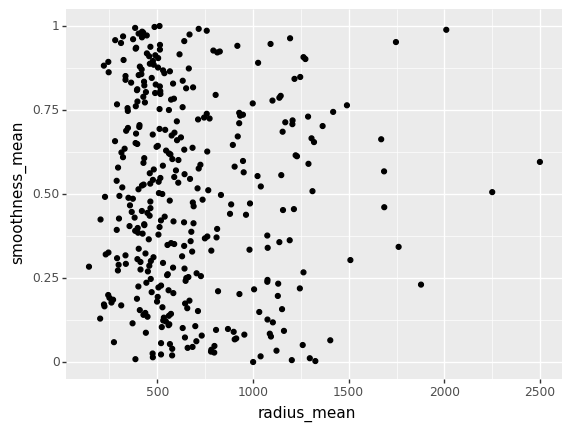

<ggplot: (8755844044081)>

In [310]:
from plotnine import *
mcodf=pd.DataFrame(list(zip(x,y)),columns=['radius_mean','smoothness_mean'])
ggplot(mcodf)+ aes(x="radius_mean", y="smoothness_mean")+geom_point()

## The heatmap() Function

To  easily  pinpoint  the  columns  exhibiting  high  correlation,  you  can  create  a  heatmap  using the heatmap() function of the seaborn module.It takes the DataFrame containing the correlation coefficient values as an input and returns an N-dimensional heat map in which each cells are represented through colour densities.

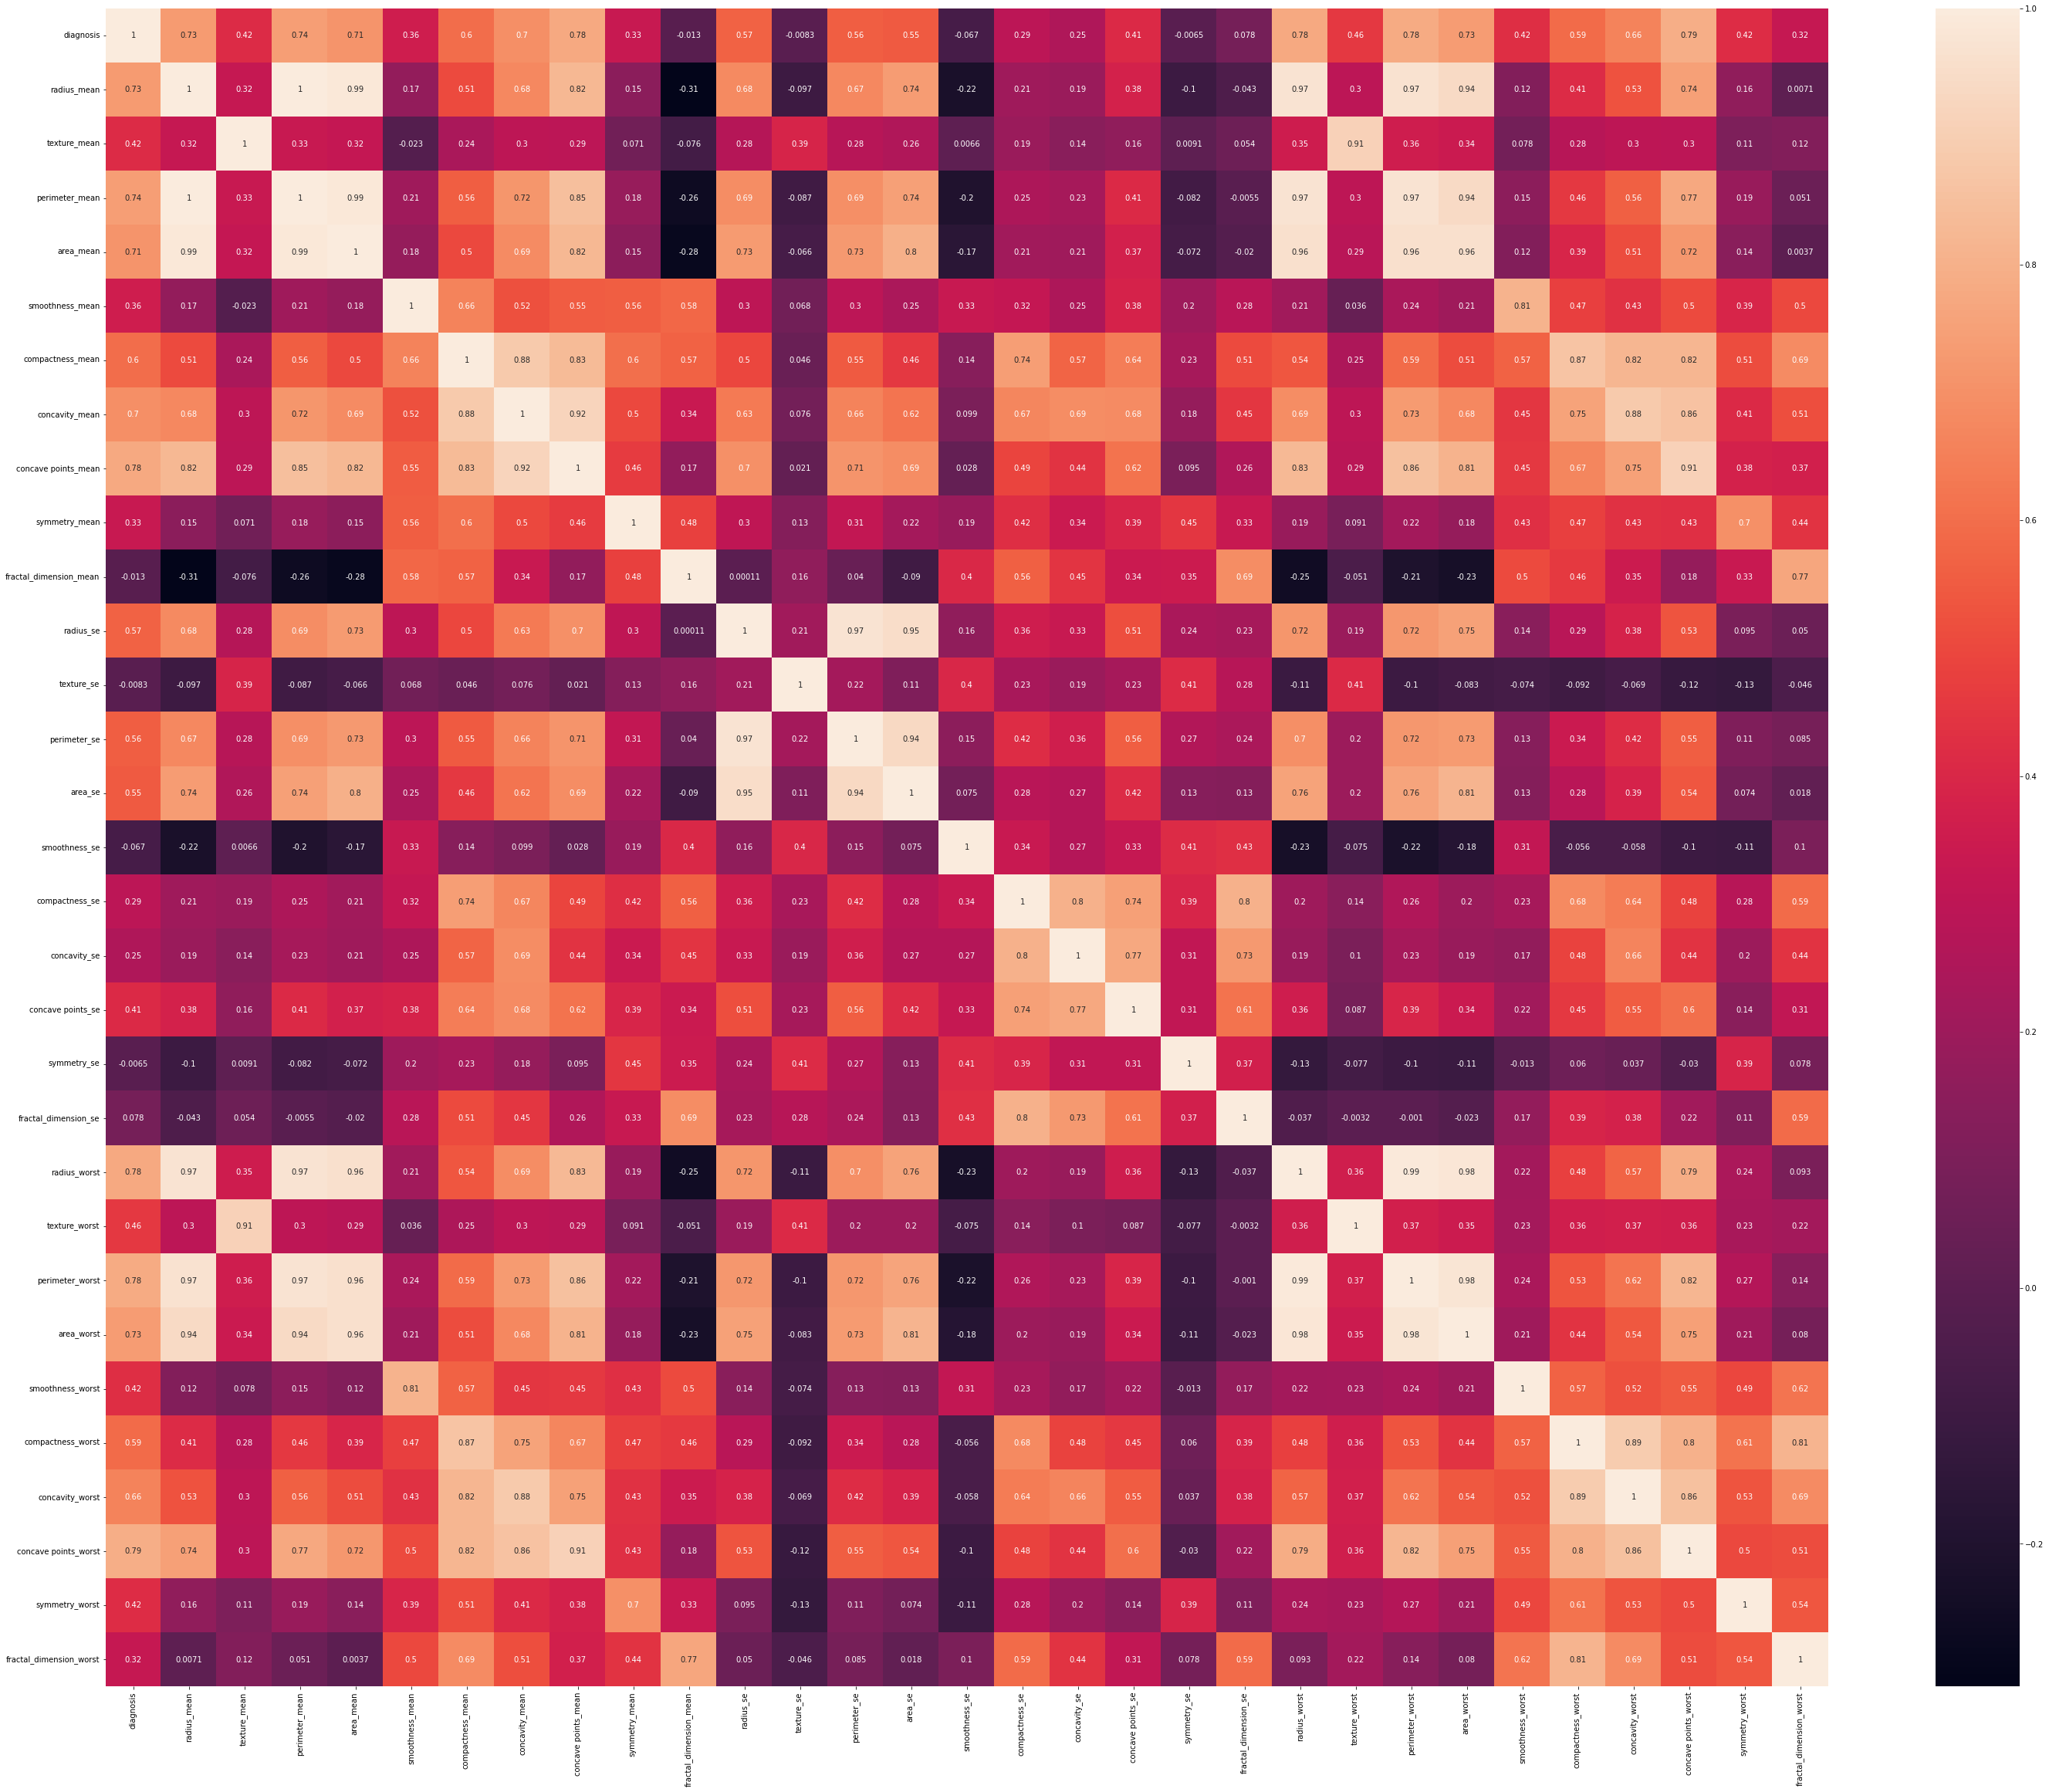

In [311]:
plt.figure(figsize = [50, 40], facecolor = 'white')
sns.heatmap(df.corr(),annot=True)


● NO Multicollinearity is detected

● The higher value of (area_worst ,perimeter_worst,texture_worst,area_mean,perimeter_mean ) is higher to be infected with Breast Canser & may be this parameter will have more weight in our model ,lets check it later.

● in this dataset ther are good coloration value between more of features even it +ve or -ve and no need Break it (Normal Values)

## Scatter plots

In [312]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [313]:
import hvplot.pandas
df.hvplot(x='diagnosis', y=['radius_mean', 'texture_mean', 'smoothness_mean', 'area_mean','compactness_mean','concavity_mean'	,'radius_worst',	'texture_worst'	,'perimeter_worst'], kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [diagnosis]   (value)

## Pie chart

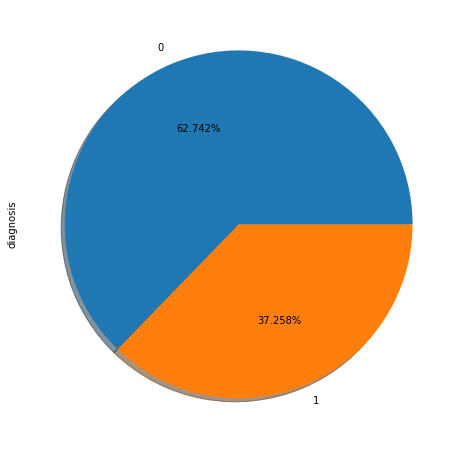

In [314]:
plt.figure(figsize = [8, 8], clear = True, )
df["diagnosis"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

37.258% - Malignant
62.742% - Benign

In [315]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Algorithm Implementation

## Creating a test set and a training set

In [316]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
categories= [ 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df[categories] = df[categories].apply(le.fit_transform)

In [317]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

transformer = Normalizer().fit(df[categories])
X = transformer.transform(df[categories])
Y = (df[['diagnosis']])
Y = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=25)

In [318]:
traindf, testdf = train_test_split(df, test_size = 0.3)

Since this data set is not ordered, I am going to do a simple 70:30 split to create a training data set and a test data set.

## Model classification

In [319]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score

In [320]:
#List to store accuracy of the methods
accuracies = []
KFold_accuracies = []
methods = ['Logistic Regression','Decision Tree','Random Forest Tree','SVM','KNN']

In [321]:
#Generic function for making a classification model and accessing the performance. 
from sklearn.model_selection import cross_validate
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

## Logistic Regression model

Logistic regression is widely used for classification of discrete data. In this case we will use it for binary (1,0) classification.

Based on the observations in the histogram plots, we can reasonably hypothesize that the cancer diagnosis depends on the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity and mean concave points. We can then perform a logistic regression analysis using those features as follows:

In [322]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 91.709%


The prediction accuracy is reasonable. What happens if we use just one predictor? Use the mean_radius:

In [323]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 87.688%


In [324]:
# fit a Logistic Regression model to the data 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, Y_train) 
print(model) 
# make predictions 
expected = Y_train 
predicted = model.predict(X_train) 
# summarize the fit of the model 
print(metrics.classification_report(expected, predicted)) 
cm = metrics.confusion_matrix(expected, predicted)

accuracies.append(metrics.accuracy_score(expected, predicted))

k = 5
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X, Y, cv = kf)

KFold_accuracies.append(result.mean()*100)

LogisticRegression(random_state=0)
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       244
           1       0.82      0.81      0.81       154

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.85      0.85      0.85       398



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWa

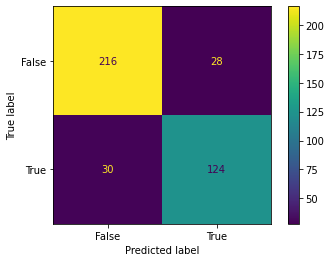

In [325]:
cm=metrics.confusion_matrix(expected, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

## Decision Tree Model

In [326]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%


Here we are over-fitting the model probably due to the large number of predictors. Let use a single predictor, the obvious one is the radius of the cell.

In [327]:
predictor_var = ['radius_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 97.487%


The accuracy of the prediction is much much better here. But does it depend on the predictor?

Using a single predictor gives a 97% prediction accuracy for this model but the cross-validation score is not that great.

In [328]:
# fit a Decision Tree model to the data 
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model) 
# make predictions 
expected = Y_train 
predicted = model.predict(X_train) 
# summarize the fit of the model 
print(metrics.classification_report(expected, predicted)) 
cm = metrics.confusion_matrix(expected, predicted)

accuracies.append(metrics.accuracy_score(expected, predicted))

k = 5
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X, Y, cv = kf)

KFold_accuracies.append(result.mean()*100)

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00       154

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



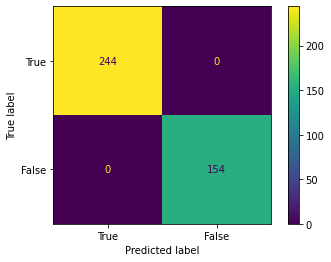

In [329]:
cm=metrics.confusion_matrix(expected, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['True', 'False'])
cm_display.plot()
plt.show()

## Random Forest

In [330]:
features_mean=list(df.columns[1:11])

In [331]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 95.729%


In [332]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.267264
perimeter_mean            0.164100
radius_mean               0.154742
concavity_mean            0.135808
area_mean                 0.133893
compactness_mean          0.053836
texture_mean              0.040778
smoothness_mean           0.028641
fractal_dimension_mean    0.010957
symmetry_mean             0.009983
dtype: float64


In [333]:
# Using top 5 features
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 95.226%


Using the top 5 features only changes the prediction accuracy a bit but I think we get a better result if we use all the predictors.

What happens if we use a single predictor as before? Just check.

In [334]:
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 97.487%


This gives a better prediction accuracy too but the cross-validation is not great.

In [335]:
# fit a Random Forest model to the data 
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
model.fit(X_train, Y_train)
print(model) 
# make predictions 
expected = Y_train 
predicted = model.predict(X_train) 
# summarize the fit of the model 
print(metrics.classification_report(expected, predicted)) 
cm = metrics.confusion_matrix(expected, predicted)

accuracies.append(metrics.accuracy_score(expected, predicted))

k = 5
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X, Y, cv = kf)

KFold_accuracies.append(result.mean()*100)

<ipython-input-335-642d7d296be0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=7, max_features=2, min_samples_split=25)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       244
           1       1.00      0.95      0.98       154

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/m

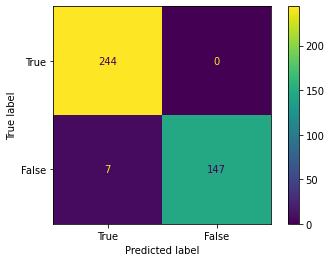

In [336]:
cm=metrics.confusion_matrix(expected, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['True', 'False'])
cm_display.plot()
plt.show()

# Using on the test data set

In [337]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy : 95.322%


The prediction accuracy for the test data set using the above Random Forest model is 97%

SVM

In [338]:
# fit a SVM model to the data 
model = SVC() 
model.fit(X_train,Y_train ) 
print(model) 
# make predictions 
expected = Y_train
predicted = model.predict(X_train) 
# summarize the fit of the model 
print(metrics.classification_report(expected, predicted)) 
cm = metrics.confusion_matrix(expected, predicted)
accuracies.append(metrics.accuracy_score(expected, predicted))

k = 5
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , X, Y, cv = kf)

KFold_accuracies.append(result.mean()*100)

SVC()
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       244
           1       0.94      0.96      0.95       154

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWa

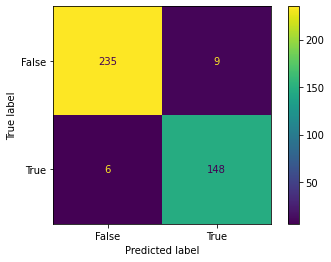

In [339]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

KNN

In [340]:
# fit a KNN model to the data 
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, Y_train) 
print(model) 
# make predictions 
expected = Y_train 
predicted = model.predict(X_train) 
# summarize the fit of the model 
print(metrics.classification_report(expected, predicted)) 
cm = metrics.confusion_matrix(expected, predicted)

accuracies.append(metrics.accuracy_score(expected, predicted))

k = 5
kf = KFold(n_splits=k, random_state=None) 
result = cross_val_score(model , X, Y, cv = kf)

KFold_accuracies.append(result.mean()*100)

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       244
           1       0.80      0.99      0.88       154

    accuracy                           0.90       398
   macro avg       0.90      0.92      0.90       398
weighted avg       0.92      0.90      0.90       398



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors

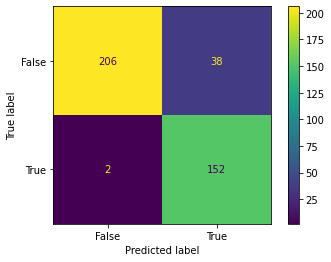

In [341]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

Comparing Accuracies of the Algorithms

In [342]:
for x in range(0, len(accuracies)):
    accuracies[x] = accuracies[x] * 100
D = np.array([methods,accuracies,KFold_accuracies])
Acc = pd.DataFrame(D.transpose(),columns=['Methods','Accuracies','KFold_Cross_Validation'])
Acc

,Methods,Accuracies,KFold_Cross_Validation
0,Logistic Regression,85.42713567839196,82.77441391088341
1,Decision Tree,100.0,100.0
2,Random Forest Tree,98.24120603015075,95.43704393727681
3,SVM,96.23115577889448,92.4375097034622
4,KNN,89.9497487437186,85.929203539823


Plotting Bar Graph for Accuracies

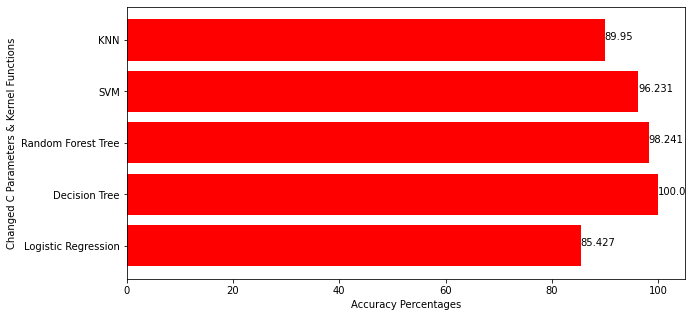

In [343]:
fig = plt.figure(figsize = (10, 5))

plt.barh(methods, accuracies, color='red')
plt.ylabel("Changed C Parameters & Kernel Functions")
plt.xlabel("Accuracy Percentages")

for index, value in enumerate(accuracies):
    plt.text(value, index, str(round(value,3)))

plt.show()

# Conclusion

The best model to be used for diagnosing breast cancer as found in this analysis is the Random Forest model with the top 5 predictors, 'concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean'. It gives a prediction accuracy of ~95% and a cross-validation score ~ 93% for the test data set.


# Downloading the final dataset

In [344]:
from google.colab import files
df.to_csv('finaldata.csv') 
files.download('finaldata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>